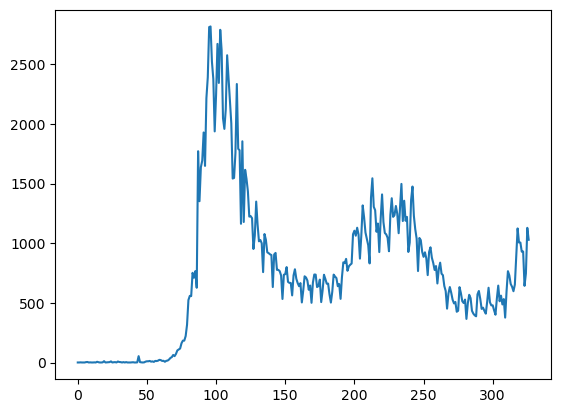

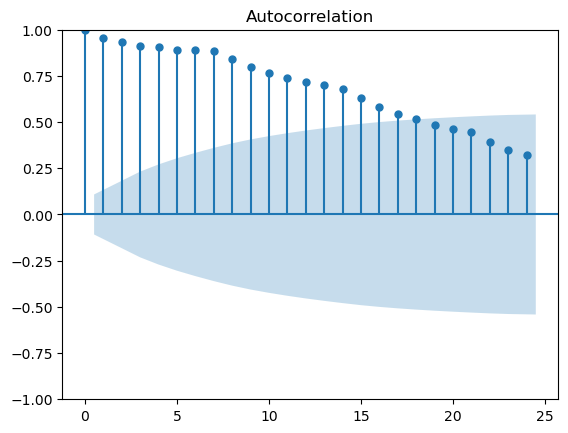

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


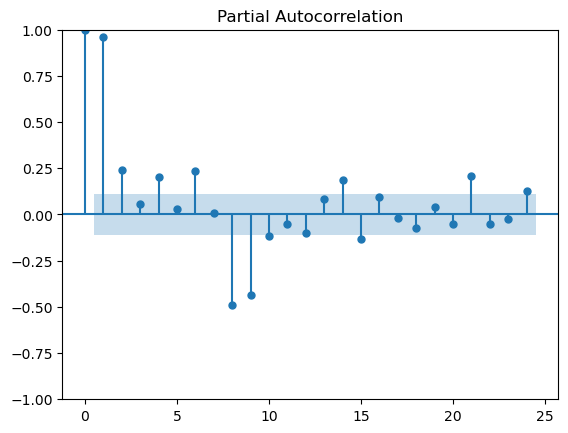

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\新竹縣每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Hsinchu_County.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Hsinchu_County_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Hsinchu_County_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\新竹縣每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        1
2        2
3        1
4        1
..     ...
323    643
324    747
325   1129
326   1029
327    848

[328 rows x 1 columns]
328


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
30/30 [==============================] - 4s 35ms/step - loss: 0.1058 - mse: 0.1058 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 2/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 3/5000
30/30 [==============================]

30/30 [==============================] - 0s 12ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 57/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 58/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 59/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 60/5000
30/30 [==============================] - 0s 12ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 61/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 62/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 63/5000
30/30 [==============================] - 0s 12ms/step - loss: 0.0

30/30 [==============================] - 0s 7ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 118/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 119/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 120/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 121/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 122/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 123/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 124/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 179/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 180/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 181/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 182/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 183/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 184/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 185/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 240/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 241/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 242/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 243/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 244/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 245/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 246/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 301/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 302/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 303/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 304/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 305/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 306/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 307/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 362/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 363/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 364/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 365/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 366/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 367/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 368/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 423/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 424/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 425/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 426/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 427/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 428/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 429/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 484/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 485/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 486/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 487/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 488/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 489/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 490/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 545/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 546/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 547/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 548/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 549/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 550/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 551/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 606/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 607/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 608/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 609/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 610/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 611/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 612/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 667/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 668/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 669/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 670/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 671/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 672/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 673/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 728/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 729/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 730/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 731/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 732/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 733/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 734/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 789/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 790/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 791/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 792/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 793/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 794/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 795/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 850/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 851/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 852/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 853/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 854/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 855/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 856/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 911/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 912/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 913/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 914/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 915/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 916/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 917/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 972/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 973/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 974/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 975/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 976/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 977/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 978/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1033/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1034/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1035/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1036/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1037/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1038/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1039/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1093/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1094/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1095/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1096/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1097/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1098/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1099/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1100/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1154/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1155/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1156/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1157/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1158/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1159/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1160/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1214/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1215/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1216/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1217/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1218/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1219/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1220/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1221/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1275/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1276/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1277/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1278/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1279/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1280/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1281/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1335/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1336/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1337/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1338/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1339/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1340/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1341/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1342/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1396/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1397/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1398/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1399/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1400/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1401/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1402/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1456/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1457/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1458/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1459/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1460/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1461/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1462/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1463/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1517/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1518/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1519/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1520/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1521/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1522/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1523/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1577/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1578/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1579/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1580/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1581/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1582/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1583/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1584/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1638/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1639/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1640/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1641/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1642/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1643/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1644/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1698/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1699/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1700/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1701/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1702/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1703/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1704/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1705/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1759/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1760/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1761/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1762/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1763/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1764/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1765/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1819/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1820/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1821/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1822/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1823/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1824/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1825/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1826/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1880/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1881/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1882/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1883/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1884/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1885/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1886/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1940/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1941/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1942/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1943/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1944/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1945/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1946/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1947/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2001/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2002/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2003/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2004/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2005/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2006/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2007/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2061/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2062/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2063/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2064/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2065/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2066/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2067/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2068/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2122/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2123/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2124/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2125/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2126/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2127/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2128/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2182/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2183/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2184/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2185/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2186/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2187/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2188/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2189/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2243/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2244/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2245/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2246/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2247/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2248/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2249/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2303/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2304/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2305/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2306/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2307/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2308/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2309/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2310/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2364/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2365/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2366/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2367/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2368/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2369/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2370/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2424/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2425/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2426/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2427/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2428/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2429/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2430/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2431/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2485/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2486/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2487/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2488/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2489/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2490/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2491/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2545/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2546/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2547/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2548/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2549/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2550/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2551/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2552/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2606/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2607/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2608/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2609/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2610/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2611/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2612/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2666/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2667/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2668/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2669/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2670/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2671/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2672/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2673/5000
30/30 [==============================] 

30/30 [==============================] - 0s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2727/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2728/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2729/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2730/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2731/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2732/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2733/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2787/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2788/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2789/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2790/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2791/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2792/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2793/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2794/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2848/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2849/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2850/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2851/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2852/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2853/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2854/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2908/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2909/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2910/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2911/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2912/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2913/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2914/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2915/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2969/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2970/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2971/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2972/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2973/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2974/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2975/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3029/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3030/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3031/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3032/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3033/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3034/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3035/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3036/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3090/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3091/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3092/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3093/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3094/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3095/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3096/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3150/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3151/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3152/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3153/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3154/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3155/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3156/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3157/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3211/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3212/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3213/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3214/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3215/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3216/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3217/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3271/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3272/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3273/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3274/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3275/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3276/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3277/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3278/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3332/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3333/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3334/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3335/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3336/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3337/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3338/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3392/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3393/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3394/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3395/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3396/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3397/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3398/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3399/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3453/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3454/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3455/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3456/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3457/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3458/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3459/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3513/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3514/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3515/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3516/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3517/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3518/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3519/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3520/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3574/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3575/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3576/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3577/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3578/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3579/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3580/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3634/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3635/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3636/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3637/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3638/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3639/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3640/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3641/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3695/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3696/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3697/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3698/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3699/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3700/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3701/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3755/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3756/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3757/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3758/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3759/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3760/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3761/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3762/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3816/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3817/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3818/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3819/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3820/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3821/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3822/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3876/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3877/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3878/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3879/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3880/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3881/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3882/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3883/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3937/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3938/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3939/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3940/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3941/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3942/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3943/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3997/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3998/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3999/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4000/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4001/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4002/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4003/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4004/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4058/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4059/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4060/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4061/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4062/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4063/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4064/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4118/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4119/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4120/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4121/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4122/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4123/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4124/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4125/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4179/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4180/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4181/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4182/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4183/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4184/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4185/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4239/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4240/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4241/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4242/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4243/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4244/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4245/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4246/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4300/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4301/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4302/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4303/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4304/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4305/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4306/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4360/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4361/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4362/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4363/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4364/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4365/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4366/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4367/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4421/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4422/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4423/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4424/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4425/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4426/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4427/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4481/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4482/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4483/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4484/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4485/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4486/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4487/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4488/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4542/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4543/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4544/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4545/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4546/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4547/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4548/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4602/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4603/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4604/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4605/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4606/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4607/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4608/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4609/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4663/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4664/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4665/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4666/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4667/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4668/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4669/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4723/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4724/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4725/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4726/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4727/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4728/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4729/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4730/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4784/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4785/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4786/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4787/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4788/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4789/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4790/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4844/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4845/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4846/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4847/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4848/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4849/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4850/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4851/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4905/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4906/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4907/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4908/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4909/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4910/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4911/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4965/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4966/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4967/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4968/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4969/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4970/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4971/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4972/5000
30/30 [==============================] 

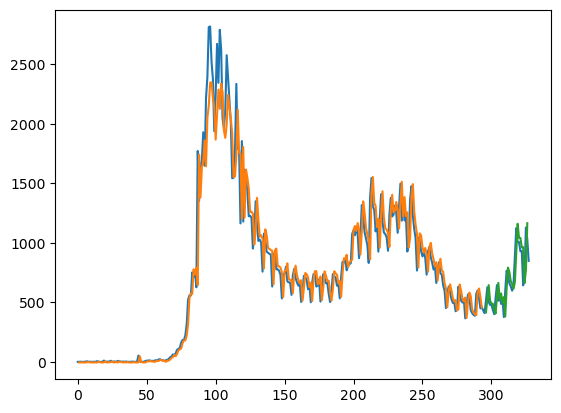

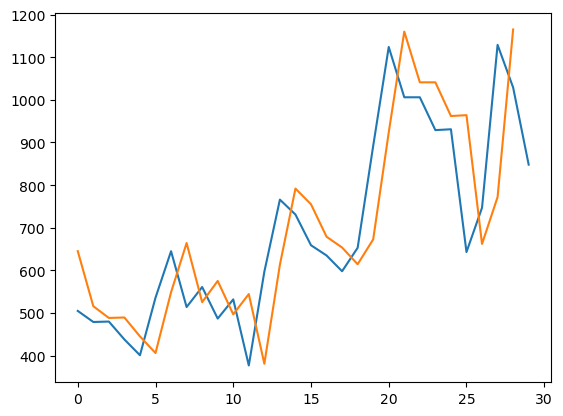

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="hsinchuCounty_rnn+lstm_5000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('hsinchuCounty_rnn+lstm_5000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('hsinchuCounty_rnn+lstm_5000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("hsinchuCounty_rnn+lstm_5000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
30/30 [==============================] - 5s 43ms/step - loss: 0.0985 - mse: 0.0985 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 2/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0584 - mse: 0.0584 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3/5000
30/30 [==========================

30/30 [==============================] - 0s 12ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 57/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 58/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 59/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 60/5000
30/30 [==============================] - 0s 12ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 61/5000
30/30 [==============================] - 0s 12ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 62/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 63/5000
30/30 [==============================] - 0s 12ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 118/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 119/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 120/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 121/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 122/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 123/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 124/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 179/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 180/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 181/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 182/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 183/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 184/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 185/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 240/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 241/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 242/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 243/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 244/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 245/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 246/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 301/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 302/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 303/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 304/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 305/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 306/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 307/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 9ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 362/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 363/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 364/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 365/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 366/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 367/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 368/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 9ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 423/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 424/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 425/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 426/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 427/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 428/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 429/5000
30/30 [==============================] - 0s 8ms/step - loss:

30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 484/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 485/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 486/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 487/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 488/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 489/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 490/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 545/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 546/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 547/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 548/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 549/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 550/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 551/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 606/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 607/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 608/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 609/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 610/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 611/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 612/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 667/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 668/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 669/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 670/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 671/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 672/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 673/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 728/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 729/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 730/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 731/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 732/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 733/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 734/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 789/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 790/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 791/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 792/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 793/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 794/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 795/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 850/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 851/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 852/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 853/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 854/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 855/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 856/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 911/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 912/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 913/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 914/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 915/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 916/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 917/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 9ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 972/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 973/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 974/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 975/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 976/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 977/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 978/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1033/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1034/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1035/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1036/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1037/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1038/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1039/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1093/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1094/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1095/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1096/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1097/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1098/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1099/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1100/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1154/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1155/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1156/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1157/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1158/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1159/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1160/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1214/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1215/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1216/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1217/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1218/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1219/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1220/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1221/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1275/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1276/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1277/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1278/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1279/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1280/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1281/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1335/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1336/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1337/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1338/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1339/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1340/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1341/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1342/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1396/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1397/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1398/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1399/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1400/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1401/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1402/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 1456/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1457/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1458/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1459/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1460/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1461/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1462/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1463/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1517/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1518/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1519/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1520/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1521/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1522/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1523/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1577/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1578/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1579/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1580/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1581/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1582/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1583/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1584/5000
30/30 [==============================]

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1638/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1639/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1640/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1641/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1642/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1643/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1644/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 1698/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1699/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1700/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1701/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1702/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1703/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1704/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1705/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1759/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1760/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1761/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1762/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1763/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1764/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1765/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 1819/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1820/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1821/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1822/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1823/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1824/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1825/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1826/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1880/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1881/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1882/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1883/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1884/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1885/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1886/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1940/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1941/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1942/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1943/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1944/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1945/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1946/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1947/5000
30/30 [==============================] 

30/30 [==============================] - 1s 18ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2001/5000
30/30 [==============================] - 1s 23ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2002/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2003/5000
30/30 [==============================] - 0s 13ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2004/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2005/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2006/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2007/5000
30/30 [==============================] - 0s 7ms/step

Epoch 2061/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2062/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2063/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2064/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2065/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2066/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2067/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2068/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2122/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2123/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2124/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2125/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2126/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2127/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2128/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2182/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2183/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2184/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2185/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2186/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2187/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2188/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2189/5000
30/30 [==============================]

30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2243/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2244/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2245/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2246/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2247/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2248/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2249/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2303/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2304/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2305/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2306/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2307/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2308/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2309/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2310/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2364/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2365/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2366/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2367/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2368/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2369/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2370/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2424/5000
30/30 [==============================] - 0s 12ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2425/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2426/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2427/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2428/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2429/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2430/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2431/5000
30/30 [==============================]

30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2485/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2486/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2487/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2488/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2489/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2490/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2491/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2545/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2546/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2547/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2548/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2549/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2550/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2551/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2552/5000
30/30 [==============================

30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2606/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2607/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2608/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2609/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2610/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2611/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2612/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2666/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2667/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2668/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2669/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2670/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2671/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2672/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2673/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2727/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2728/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2729/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2730/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2731/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2732/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2733/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2787/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2788/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2789/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2790/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2791/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2792/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2793/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2794/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2848/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2849/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2850/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2851/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2852/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2853/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2854/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2908/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2909/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2910/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2911/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2912/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2913/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2914/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2915/5000
30/30 [==============================] 

30/30 [==============================] - 0s 9ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2969/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2970/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2971/5000
30/30 [==============================] - 1s 19ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2972/5000
30/30 [==============================] - 0s 14ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2973/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2974/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2975/5000
30/30 [==============================] - 0s 15ms/step

Epoch 3029/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3030/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3031/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3032/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3033/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3034/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3035/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3036/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3090/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3091/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3092/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3093/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3094/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3095/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3096/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 3150/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3151/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3152/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3153/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3154/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3155/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3156/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3157/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3211/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3212/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3213/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3214/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3215/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3216/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3217/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3271/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3272/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3273/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3274/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3275/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3276/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3277/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3278/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3332/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3333/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3334/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3335/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3336/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3337/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3338/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3392/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3393/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3394/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3395/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3396/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3397/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3398/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3399/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3453/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3454/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3455/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3456/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3457/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3458/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3459/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3513/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3514/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3515/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3516/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3517/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3518/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3519/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3520/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3574/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3575/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3576/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3577/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3578/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3579/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3580/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3634/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3635/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3636/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3637/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3638/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3639/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3640/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3641/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3695/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3696/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3697/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3698/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3699/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3700/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3701/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3755/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3756/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3757/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3758/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3759/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3760/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3761/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3762/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3816/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3817/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3818/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3819/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3820/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3821/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3822/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 3876/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3877/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3878/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3879/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3880/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3881/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3882/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3883/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3937/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3938/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3939/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3940/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3941/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3942/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3943/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 3997/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3998/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3999/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4000/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4001/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4002/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4003/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4004/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4058/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4059/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4060/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4061/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4062/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4063/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4064/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 4118/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4119/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4120/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4121/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4122/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4123/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4124/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4125/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4179/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4180/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4181/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4182/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4183/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4184/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4185/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4239/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4240/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4241/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4242/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4243/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4244/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4245/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4246/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4300/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4301/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4302/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4303/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4304/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4305/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4306/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4360/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4361/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4362/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4363/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4364/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4365/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4366/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4367/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4421/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4422/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4423/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4424/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4425/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4426/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4427/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 4481/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4482/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4483/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4484/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4485/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4486/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4487/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4488/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4542/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4543/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4544/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4545/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4546/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4547/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4548/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4602/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4603/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4604/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4605/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4606/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4607/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4608/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4609/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4663/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4664/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4665/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4666/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4667/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4668/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4669/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4723/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4724/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4725/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4726/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4727/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4728/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4729/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4730/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4784/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4785/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4786/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4787/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4788/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4789/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4790/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4844/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4845/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4846/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4847/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4848/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4849/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4850/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4851/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4905/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4906/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4907/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4908/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4909/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4910/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4911/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4965/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4966/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4967/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4968/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4969/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4970/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4971/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4972/5000
30/30 [==============================] 

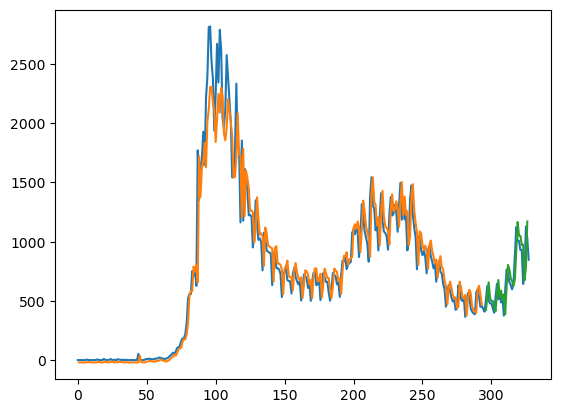

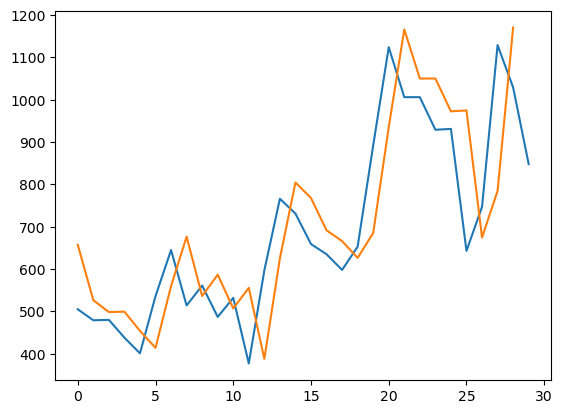

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="hsinchuCounty_rnn+lstm_5000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('hsinchuCounty_rnn+lstm_5000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('hsinchuCounty_rnn+lstm_5000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("hsinchuCounty_rnn+lstm_5000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-trai

30/30 [==============================] - 0s 8ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 54/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 55/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 56/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 57/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 58/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 59/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 60/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0061 -

30/30 [==============================] - 0s 8ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 115/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 116/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 117/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 118/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 119/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 120/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 121/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 176/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 177/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 178/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 179/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 180/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 181/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 182/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 237/5000
30/30 [==============================] - 0s 14ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 238/5000
30/30 [==============================] - 0s 16ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 239/5000
30/30 [==============================] - 0s 13ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 240/5000
30/30 [==============================] - 0s 15ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 241/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 242/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 243/5000
30/30 [==============================] - 0s 11ms/step - lo

30/30 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 298/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 299/5000
30/30 [==============================] - 0s 14ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 300/5000
30/30 [==============================] - 0s 14ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 301/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 302/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 303/5000
30/30 [==============================] - 0s 13ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 304/5000
30/30 [==============================] - 0s 8ms/step - lo

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 359/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 360/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 361/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 362/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 363/5000
30/30 [==============================] - 0s 15ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 364/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 365/5000
30/30 [==============================] - 0s 13ms/step - loss:

30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 420/5000
30/30 [==============================] - 0s 13ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 421/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 422/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 423/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 424/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 425/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 426/5000
30/30 [==============================] - 0s 8ms/step - loss: 

30/30 [==============================] - 0s 10ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 481/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 482/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 483/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 484/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 485/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 486/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 487/5000
30/30 [==============================] - 0s 8ms/step - loss:

30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 542/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 543/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 544/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 545/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 546/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 547/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 548/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 603/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 604/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 605/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 606/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 607/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 608/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 609/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 664/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 665/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 666/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 667/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 668/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 669/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 670/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 725/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 726/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 727/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 728/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 729/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 730/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 731/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 786/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 787/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 788/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 789/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 790/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 791/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 792/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 847/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 848/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 849/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 850/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 851/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 852/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 853/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 908/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 909/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 910/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 911/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 912/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 913/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 914/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 969/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 970/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 971/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 972/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 973/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 974/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 975/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1030/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1031/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1032/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1033/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1034/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1035/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1036/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 1090/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1091/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1092/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1093/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1094/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1095/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1096/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1097/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1151/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1152/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1153/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1154/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1155/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1156/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1157/5000
30/30 [==============================] - 0s 9ms/step - 

Epoch 1211/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1212/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1213/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1214/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1215/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1216/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1217/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1218/5000
30/30 [==============================] 

30/30 [==============================] - 0s 13ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1272/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1273/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1274/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1275/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1276/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1277/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1278/5000
30/30 [==============================] - 0s 8ms/step -

Epoch 1332/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1333/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1334/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1335/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1336/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1337/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1338/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1339/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1393/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1394/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1395/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1396/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1397/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1398/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1399/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 1453/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1454/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1455/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1456/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1457/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1458/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1459/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1460/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1514/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1515/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1516/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1517/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1518/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1519/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1520/5000
30/30 [==============================] - 0s 9ms/step - 

Epoch 1574/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1575/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1576/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1577/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1578/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1579/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1580/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1581/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1635/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1636/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1637/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1638/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1639/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1640/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1641/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 1695/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1696/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1697/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1698/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1699/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1700/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1701/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1702/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1756/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1757/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1758/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1759/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1760/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1761/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1762/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 1816/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 1817/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1818/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 1819/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1820/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1821/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1822/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1823/5000
30/30 [==============================] 

30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1877/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1878/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1879/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 1880/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1881/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1882/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1883/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 1937/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1938/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1939/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1940/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1941/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 1942/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1943/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1944/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1998/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1999/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2000/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2001/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2002/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2003/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2004/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2058/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2059/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2060/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2061/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2062/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2063/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2064/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2065/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2119/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2120/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2121/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2122/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2123/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2124/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2125/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2179/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2180/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2181/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2182/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2183/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2184/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2185/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2186/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2240/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2241/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2242/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2243/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2244/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2245/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2246/5000
30/30 [==============================] - 0s 12ms/step -

Epoch 2300/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2301/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2302/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2303/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2304/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2305/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2306/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2307/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2361/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2362/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2363/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2364/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2365/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2366/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2367/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2421/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2422/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2423/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2424/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2425/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2426/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2427/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2428/5000
30/30 [==============================] 

30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2482/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2483/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2484/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2485/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2486/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2487/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2488/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2542/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2543/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2544/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2545/5000
30/30 [==============================] - 1s 24ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2546/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2547/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2548/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2549/5000
30/30 [==============================]

30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2603/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2604/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2605/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2606/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2607/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2608/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2609/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2663/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2664/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2665/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2666/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2667/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2668/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2669/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2670/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2724/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2725/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2726/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2727/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2728/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2729/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2730/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2784/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2785/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2786/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2787/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2788/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2789/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2790/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2791/5000
30/30 [==============================]

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2845/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2846/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2847/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2848/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2849/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2850/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2851/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2905/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2906/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2907/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2908/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2909/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2910/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2911/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2912/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2966/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2967/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2968/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2969/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2970/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2971/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2972/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 3026/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3027/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3028/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3029/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3030/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3031/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3032/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3033/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3087/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3088/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3089/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3090/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3091/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3092/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3093/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 3147/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3148/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3149/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3150/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3151/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3152/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3153/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3154/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3208/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3209/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3210/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3211/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3212/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3213/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3214/5000
30/30 [==============================] - 0s 9ms/step - 

Epoch 3268/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3269/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3270/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3271/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3272/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3273/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3274/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3275/5000
30/30 [==============================] 

30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3329/5000
30/30 [==============================] - 0s 15ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3330/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3331/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3332/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3333/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3334/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3335/5000
30/30 [==============================] - 0s 9ms/step -

Epoch 3389/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3390/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3391/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3392/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3393/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3394/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3395/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3396/5000
30/30 [==============================

30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3450/5000
30/30 [==============================] - 0s 16ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3451/5000
30/30 [==============================] - 1s 25ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3452/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3453/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3454/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3455/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3456/5000
30/30 [==============================] - 0s 9ms/st

30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3510/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3511/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3512/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3513/5000
30/30 [==============================] - 0s 12ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3514/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3515/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3516/5000
30/30 [==============================] - 0s 9ms/st

Epoch 3570/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3571/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3572/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3573/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3574/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3575/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3576/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3577/5000
30/30 [==============================] 

30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3631/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3632/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3633/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3634/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3635/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3636/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3637/5000
30/30 [==============================] - 0s 9ms/step -

Epoch 3691/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3692/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3693/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3694/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3695/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3696/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3697/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3698/5000
30/30 [==============================

30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3752/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3753/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3754/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3755/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3756/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3757/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3758/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 3812/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3813/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3814/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3815/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3816/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3817/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3818/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3819/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3873/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3874/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3875/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3876/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3877/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3878/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3879/5000
30/30 [==============================] - 0s 9ms/step - 

Epoch 3933/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3934/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3935/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3936/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3937/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3938/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3939/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3940/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3994/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3995/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3996/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3997/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3998/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3999/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4000/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 4054/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4055/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4056/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4057/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4058/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4059/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4060/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4061/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4115/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4116/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4117/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4118/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4119/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4120/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4121/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 4175/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4176/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4177/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4178/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4179/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4180/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4181/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4182/5000
30/30 [==============================] 

30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4236/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4237/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4238/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4239/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4240/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4241/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4242/5000
30/30 [==============================] - 0s 11ms/ste

Epoch 4296/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4297/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4298/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4299/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4300/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4301/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4302/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4303/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4357/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4358/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4359/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4360/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4361/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4362/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4363/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 4417/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4418/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4419/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4420/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4421/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4422/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4423/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4424/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4478/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4479/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4480/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4481/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4482/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4483/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4484/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 4538/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4539/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4540/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4541/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4542/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4543/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4544/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4545/5000
30/30 [==============================

30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4599/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4600/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4601/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4602/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4603/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4604/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4605/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 4659/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4660/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4661/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4662/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4663/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4664/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4665/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4666/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4720/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4721/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4722/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4723/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4724/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4725/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4726/5000
30/30 [==============================] - 0s 8ms/step -

Epoch 4780/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4781/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4782/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4783/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4784/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4785/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4786/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4787/5000
30/30 [==============================]

30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4841/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4842/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4843/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4844/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4845/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4846/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4847/5000
30/30 [==============================] - 0s 9ms/step - 

30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4901/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4902/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4903/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4904/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4905/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4906/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4907/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 4961/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4962/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4963/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4964/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4965/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4966/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4967/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4968/5000
30/30 [==============================

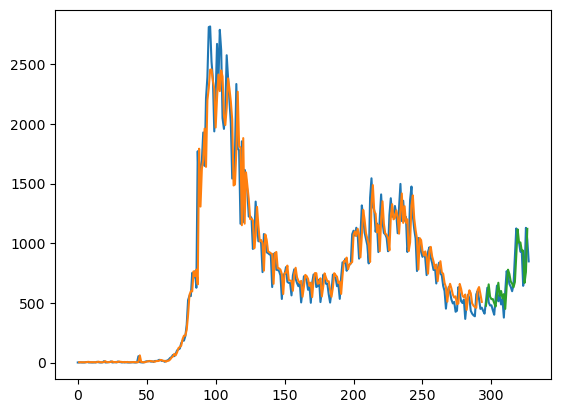

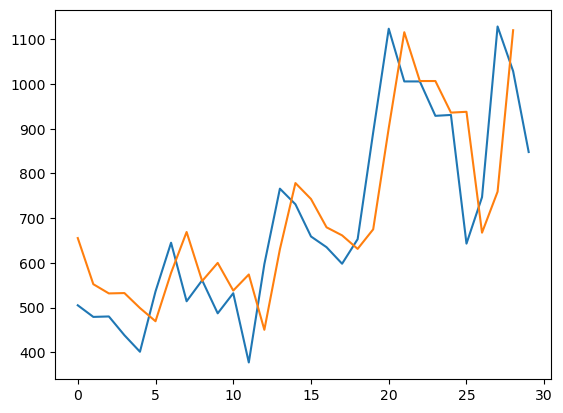

In [5]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="hsinchuCounty_rnn+lstm_5000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('hsinchuCounty_rnn+lstm_5000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('hsinchuCounty_rnn+lstm_5000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("hsinchuCounty_rnn+lstm_5000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_4 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 64)             4416      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              65        
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_6 (Dense)             (None, 1, 4)              260       
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)            

Epoch 51/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0494 - mse: 0.0494 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 52/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0481 - mse: 0.0481 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 53/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 54/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 55/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0449 - mse: 0.0449 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 56/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 57/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0400 - mse: 0.0400 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 58/5000
293/293 [==============================] 

293/293 [==============================] - 1s 5ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 112/5000
293/293 [==============================] - 1s 5ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 113/5000
293/293 [==============================] - 1s 5ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 114/5000
293/293 [==============================] - 1s 5ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 115/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 116/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 117/5000
293/293 [==============================] - 1s 5ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 118/5000
293/293 [==============================] - 1s 5m

293/293 [==============================] - 1s 5ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 172/5000
293/293 [==============================] - 1s 5ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 173/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 174/5000
293/293 [==============================] - 1s 5ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 175/5000
293/293 [==============================] - 1s 5ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 176/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 177/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 178/5000
293/293 [==============================] - 2s 5m

293/293 [==============================] - 2s 5ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 232/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 233/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 234/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 235/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 236/5000
293/293 [==============================] - 1s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 237/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 238/5000
293/293 [==============================] - 1s 5m

293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 292/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 293/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 294/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 295/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 296/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 297/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 298/5000
293/293 [==============================] - 2s 6m

293/293 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 352/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 353/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 354/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 355/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 356/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 357/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 358/5000
293/293 [==============================] - 2s 6m

293/293 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 412/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 413/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 414/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 415/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 416/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 417/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 418/5000
293/293 [==============================] - 2s 6m

293/293 [==============================] - 2s 6ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 472/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 473/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 474/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 475/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 476/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 477/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 478/5000
293/293 [==============================] - 2s 6m

293/293 [==============================] - 2s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 532/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 533/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 534/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 535/5000
293/293 [==============================] - 3s 10ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 536/5000
293/293 [==============================] - 3s 11ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 537/5000
293/293 [==============================] - 2s 8ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 538/5000
293/293 [==============================] - 2s 

293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 592/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 593/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 594/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 595/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 596/5000
293/293 [==============================] - 3s 11ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 597/5000
293/293 [==============================] - 4s 12ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 598/5000
293/293 [==============================] - 2s 

293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 652/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 653/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 654/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 655/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 656/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 657/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 658/5000
293/293 [==============================] - 2s 6m

293/293 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 712/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 713/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 714/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 715/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 716/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 717/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 718/5000
293/293 [==============================] - 2s 6m

293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 772/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 773/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 774/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 775/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 776/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 777/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 778/5000
293/293 [==============================] - 2s 6m

293/293 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 832/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 833/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 834/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 835/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 836/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 837/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 838/5000
293/293 [==============================] - 2s 6m

293/293 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 892/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 893/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 894/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 895/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 896/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 897/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 898/5000
293/293 [==============================] - 2s 6m

293/293 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 952/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 953/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 954/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 955/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 956/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 957/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 958/5000
293/293 [==============================] - 2s 6m

293/293 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1012/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1013/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1014/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1015/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1016/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1017/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1018/5000
293/293 [==============================] 

Epoch 1071/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1072/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1073/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1074/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1075/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1076/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1077/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1078/5000
293/293 [================

Epoch 1131/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1132/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 1133/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1134/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 1135/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1136/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1137/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1138/5000
293/293 [================

Epoch 1191/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1192/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1193/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1194/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1195/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1196/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 1197/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1198/5000
293/293 [================

Epoch 1251/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1252/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1253/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1254/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1255/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1256/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 1257/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1258/5000
293/293 [================

Epoch 1311/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1312/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1313/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1314/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 1315/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1316/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1317/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1318/5000
293/293 [================

Epoch 1371/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1372/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 1373/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1374/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1375/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1376/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1377/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1378/5000
293/293 [================

Epoch 1431/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 1432/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1433/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 1434/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1435/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1436/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1437/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1438/5000
293/293 [================

Epoch 1491/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 1492/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1493/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1494/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1495/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1496/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 1497/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1498/5000
293/293 [================

Epoch 1551/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1552/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1553/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1554/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1555/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1556/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1557/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1558/5000
293/293 [================

Epoch 1611/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1612/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1613/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1614/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1615/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1616/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1617/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1618/5000
293/293 [================

Epoch 1671/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1672/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1673/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1674/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1675/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1676/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1677/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1678/5000
293/293 [================

Epoch 1731/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1732/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 1733/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1734/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1735/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1736/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1737/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1738/5000
293/293 [================

Epoch 1791/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1792/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1793/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1794/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 1795/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 1796/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1797/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 1798/5000
293/293 [================

Epoch 1851/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1852/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 1853/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 1854/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 1855/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1856/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1857/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1858/5000
293/293 [================

Epoch 1911/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1912/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 1913/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1914/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1915/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 1916/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 1917/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 1918/5000
293/293 [================

Epoch 1971/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 1972/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1973/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1974/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 1975/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1976/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1977/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1978/5000
293/293 [================

Epoch 2031/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2032/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2033/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2034/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2035/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2036/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2037/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2038/5000
293/293 [================

Epoch 2091/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2092/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2093/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2094/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2095/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2096/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2097/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2098/5000
293/293 [================

Epoch 2151/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2152/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2153/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2154/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2155/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2156/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2157/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2158/5000
293/293 [================

Epoch 2211/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2212/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2213/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2214/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2215/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2216/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 2217/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2218/5000
293/293 [================

Epoch 2271/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2272/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2273/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2274/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2275/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2276/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2277/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2278/5000
293/293 [================

Epoch 2331/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2332/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2333/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2334/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2335/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2336/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2337/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2338/5000
293/293 [================

Epoch 2391/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2392/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2393/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2394/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2395/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2396/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2397/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2398/5000
293/293 [================

Epoch 2451/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2452/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2453/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 2454/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2455/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2456/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2457/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2458/5000
293/293 [================

Epoch 2511/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2512/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2513/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2514/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2515/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2516/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2517/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2518/5000
293/293 [================

Epoch 2571/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2572/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2573/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2574/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2575/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2576/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2577/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2578/5000
293/293 [================

Epoch 2631/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2632/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2633/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2634/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2635/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2636/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2637/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2638/5000
293/293 [================

Epoch 2691/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2692/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2693/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2694/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2695/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2696/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2697/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2698/5000
293/293 [================

Epoch 2751/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2752/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2753/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2754/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2755/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 2756/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2757/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2758/5000
293/293 [================

Epoch 2811/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2812/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2813/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2814/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2815/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2816/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2817/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2818/5000
293/293 [================

Epoch 2871/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2872/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2873/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2874/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2875/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2876/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2877/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 2878/5000
293/293 [================

Epoch 2931/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2932/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2933/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2934/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2935/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2936/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2937/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 2938/5000
293/293 [================

Epoch 2991/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2992/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2993/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2994/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2995/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2996/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2997/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2998/5000
293/293 [================

Epoch 3051/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3052/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 3053/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3054/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3055/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3056/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3057/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3058/5000
293/293 [================

Epoch 3111/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3112/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3113/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3114/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3115/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3116/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3117/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3118/5000
293/293 [================

Epoch 3171/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3172/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3173/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3174/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3175/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3176/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3177/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3178/5000
293/293 [================

Epoch 3231/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3232/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3233/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3234/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3235/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3236/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3237/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3238/5000
293/293 [================

Epoch 3291/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3292/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3293/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3294/5000
293/293 [==============================] - 2s 7ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3295/5000
293/293 [==============================] - 2s 7ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3296/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3297/5000
293/293 [==============================] - 2s 7ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3298/5000
293/293 [================

Epoch 3351/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3352/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 3353/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3354/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3355/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3356/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3357/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3358/5000
293/293 [================

Epoch 3411/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3412/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3413/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3414/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3415/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3416/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3417/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3418/5000
293/293 [================

Epoch 3471/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3472/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3473/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3474/5000
293/293 [==============================] - 2s 7ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3475/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3476/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3477/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3478/5000
293/293 [================

Epoch 3531/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3532/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3533/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3534/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3535/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3536/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3537/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3538/5000
293/293 [================

Epoch 3591/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3592/5000
293/293 [==============================] - 2s 7ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3593/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3594/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3595/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3596/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3597/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3598/5000
293/293 [================

Epoch 3651/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3652/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3653/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3654/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3655/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3656/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3657/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3658/5000
293/293 [================

Epoch 3711/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3712/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3713/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3714/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3715/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3716/5000
293/293 [==============================] - 2s 5ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3717/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3718/5000
293/293 [================

Epoch 3771/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3772/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 3773/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3774/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 3775/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3776/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3777/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3778/5000
293/293 [================

Epoch 3831/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3832/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3833/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3834/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3835/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3836/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3837/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3838/5000
293/293 [================

Epoch 3891/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3892/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3893/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3894/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3895/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3896/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3897/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3898/5000
293/293 [================

Epoch 3951/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3952/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 3953/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3954/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3955/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3956/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3957/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3958/5000
293/293 [================

Epoch 4011/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4012/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4013/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4014/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4015/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4016/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4017/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4018/5000
293/293 [================

Epoch 4071/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 4072/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4073/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4074/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4075/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4076/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4077/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4078/5000
293/293 [================

Epoch 4131/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 4132/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4133/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4134/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4135/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4136/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4137/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4138/5000
293/293 [================

Epoch 4191/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4192/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4193/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4194/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4195/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4196/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4197/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4198/5000
293/293 [================

Epoch 4251/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4252/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4253/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4254/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4255/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4256/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4257/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4258/5000
293/293 [================

Epoch 4311/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4312/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4313/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4314/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4315/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4316/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4317/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4318/5000
293/293 [================

Epoch 4371/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4372/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4373/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4374/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4375/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4376/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4377/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4378/5000
293/293 [================

Epoch 4431/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4432/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4433/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4434/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4435/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4436/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4437/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4438/5000
293/293 [================

Epoch 4491/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4492/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4493/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4494/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4495/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4496/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4497/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4498/5000
293/293 [================

Epoch 4551/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4552/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4553/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4554/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4555/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4556/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4557/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4558/5000
293/293 [================

Epoch 4611/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4612/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4613/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4614/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4615/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4616/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4617/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4618/5000
293/293 [================

Epoch 4671/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4672/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4673/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4674/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4675/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4676/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4677/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4678/5000
293/293 [================

Epoch 4731/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4732/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4733/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4734/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4735/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4736/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4737/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4738/5000
293/293 [================

Epoch 4791/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4792/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4793/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4794/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4795/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4796/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4797/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4798/5000
293/293 [================

Epoch 4851/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4852/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4853/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4854/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4855/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4856/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4857/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4858/5000
293/293 [================

Epoch 4911/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4912/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4913/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4914/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4915/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4916/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4917/5000
293/293 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4918/5000
293/293 [================

Epoch 4971/5000
293/293 [==============================] - 2s 7ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4972/5000
293/293 [==============================] - 2s 7ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4973/5000
293/293 [==============================] - 2s 7ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4974/5000
293/293 [==============================] - 2s 7ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4975/5000
293/293 [==============================] - 2s 7ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4976/5000
293/293 [==============================] - 2s 7ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4977/5000
293/293 [==============================] - 2s 7ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4978/5000
293/293 [================

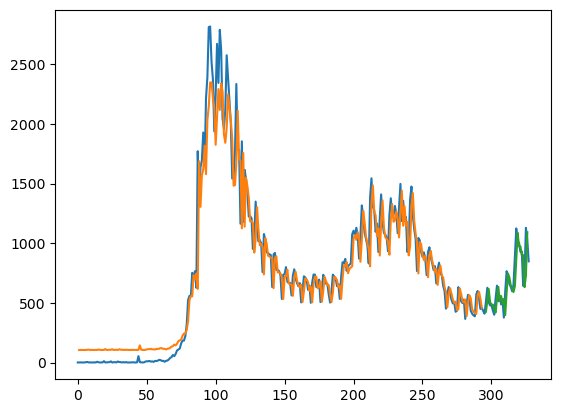

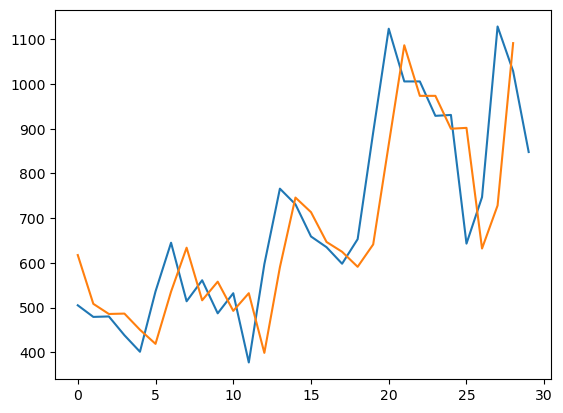

In [6]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="hsinchuCounty_rnn+lstm_5000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('hsinchuCounty_rnn+lstm_5000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('hsinchuCounty_rnn+lstm_5000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("hsinchuCounty_rnn+lstm_5000_predict&real_4.png")
plt.show()